# 0.0 Imports

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics as mt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
warnings.filterwarnings("ignore")

# 1.0 Load Dataset

In [3]:
#Data Path
data_path_X_trian = '../regressao/X_training.csv'
data_path_y_trian = '../regressao/y_training.csv'

data_path_X_val = '../regressao/X_validation.csv'
data_path_y_val = '../regressao/y_val.csv'

data_path_X_test = '../regressao/X_test.csv'
data_path_y_test = '../regressao/y_test.csv'

# Train Dataset
X_train = pd.read_csv(data_path_X_trian)
y_train = pd.read_csv(data_path_y_trian)

# Validation Dataset
X_val = pd.read_csv(data_path_X_val)
y_val = pd.read_csv(data_path_y_val)

# Test Dataset
X_test = pd.read_csv(data_path_X_test)
y_test = pd.read_csv(data_path_y_test)

In [4]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

# 2.0 Performance

## 2.1 Train Performance

In [5]:
# Define Polynomial Model
poly = PolynomialFeatures()

# Fit Polynomial Model
X_poly_train = poly.fit_transform(X_train)

# Train and Fit Model
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)


# Predict
y_pred_train = poly_reg.predict(X_poly_train)

# Performance Metrics
r2_train = mt.r2_score(y_train, y_pred_train)
mse_train = mt.mean_squared_error(y_train, y_pred_train)
rmse_train = mt.mean_squared_error(y_train, y_pred_train, squared= False)
mae_train = mt.mean_absolute_error(y_train, y_pred_train)
mape_train = mt.mean_absolute_percentage_error(y_train, y_pred_train)

print(f"Train R2: {r2_train}")
print(f"Train MSE: {mse_train}")
print(f"Train RMSE: {rmse_train}")
print(f"Train MAE: {mae_train}")
print(f"Train MAPE: {mape_train}")


Train R2: 0.09419491057528084
Train MSE: 432.9862096386579
Train RMSE: 20.80832068280999
Train MAE: 16.458031755824443
Train MAPE: 8.35053982092813


## 2.2 Validation Performance

In [6]:
# Define Polynomial Model
poly = PolynomialFeatures()

# Fit Polynomial Model
X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.fit_transform(X_val)

# Train and Fit Model
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

# Predict
y_pred_val = poly_reg.predict(X_poly_val)

# Performance Metrics
r2_val = mt.r2_score(y_val, y_pred_val)
mse_val = mt.mean_squared_error(y_val, y_pred_val)
rmse_val = mt.mean_squared_error(y_val, y_pred_val, squared= False)
mae_val = mt.mean_absolute_error(y_val, y_pred_val)
mape_val = mt.mean_absolute_percentage_error(y_val, y_pred_val)

print(f"Validation R2: {r2_val}")
print(f"Validation MSE: {mse_val}")
print(f"Validation RMSE: {rmse_val}")
print(f"Validation MAE: {mae_val}")
print(f"Validation MAPE: {mape_val}")

Validation R2: 0.06647668389711592
Validation MSE: 445.76822347127575
Validation RMSE: 21.113223900467588
Validation MAE: 16.749939090484034
Validation MAPE: 8.547931034605396


## 2.3 Fine Tunning

## Parameteres:
- `degree`

In [7]:
degree = np.arange(1,6)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [8]:
for i in degree:
    # Define Polynomial Model
    poly = PolynomialFeatures( degree=i )

    # Fit Polynomial Model
    X_poly_train = poly.fit_transform(X_train)
    X_poly_val = poly.fit_transform(X_val)

    # Train and Fit Model
    poly_reg = LinearRegression()
    poly_reg.fit(X_poly_train, y_train)

    # Predict
    y_pred_val = poly_reg.predict(X_poly_val)

    # Performance Metrics
    r2 = mt.r2_score(y_val, y_pred_val)
    mse = mt.mean_squared_error(y_val, y_pred_val)
    rmse = mt.mean_squared_error(y_val, y_pred_val, squared= False)
    mae = mt.mean_absolute_error(y_val, y_pred_val)
    mape = mt.mean_absolute_percentage_error(y_val, y_pred_val)

    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

    print(f"Degree: {i}, RMSE: {rmse}")

Degree: 1, RMSE: 21.411376458414136
Degree: 2, RMSE: 21.113223900467588
Degree: 3, RMSE: 22.36797384180068
Degree: 4, RMSE: 222.7661124492654
Degree: 5, RMSE: 10362.571605514211


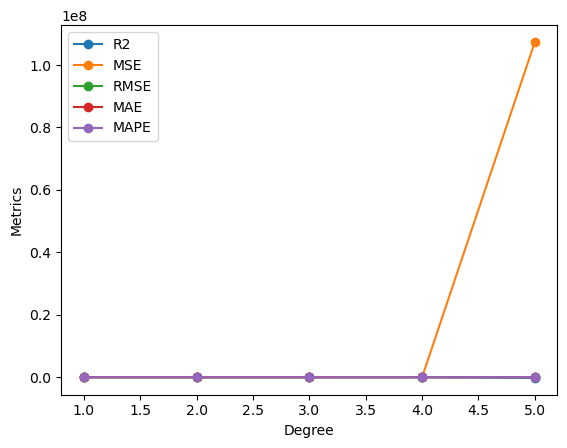

In [11]:
plt.plot(degree, r2_list ,marker ='o', label ='R2')
plt.plot(degree, mse_list ,marker ='o', label ='MSE')
plt.plot(degree, rmse_list ,marker ='o', label ='RMSE')
plt.plot(degree, mae_list ,marker ='o', label ='MAE')
plt.plot(degree, mape_list,marker ='o', label ='MAPE')
plt.xlabel('Degree')
plt.ylabel('Metrics')
plt.legend()

In [12]:
best_degree = degree[np.argmin(mse_list)]
best_degree

2

## 2.4 Test Performance

In [17]:
# Define Polynomial Model
poly = PolynomialFeatures(degree= best_degree)

# Fit Polynomial Model
X_poly_train = poly.fit_transform(X_train)
X_poly_val = poly.transform(X_val)
X_poly_test = poly.transform(X_test)

# Train and Fit Model
poly_reg = LinearRegression()
poly_reg.fit(np.concatenate((X_poly_train, X_poly_val)), np.concatenate((y_train, y_val)))

# Predict 
y_pred_test = poly_reg.predict(X_poly_test)

# Performance Metrics
r2_test = mt.r2_score(y_test, y_pred_test)
mse_test = mt.mean_squared_error(y_test, y_pred_test)
rmse_test = mt.mean_squared_error(y_test, y_pred_test, squared= False)
mae_test = mt.mean_absolute_error(y_test, y_pred_test)
mape_test = mt.mean_absolute_percentage_error(y_test, y_pred_test)

print(f"Validation R2: {r2_test}")
print(f"Validation MSE: {mse_test}")
print(f"Validation RMSE: {rmse_test}")
print(f"Validation MAE: {mae_test}")
print(f"Validation MAPE: {mape_test}")


Validation R2: 0.09090059850602805
Validation MSE: 442.64138576579467
Validation RMSE: 21.03904431683613
Validation MAE: 16.736414061349986
Validation MAPE: 8.276971685015473


# 3.0 Results

In [18]:
train_metrics = {
    "Algorithm": "Polynomial Regression",
    "R2": np.round(r2_train, 3),
    "MSE": np.round(mse_train, 3),
    "RMSE": np.round(rmse_train, 3),
    "MAE": np.round(mae_train, 3),
    "MAPE": np.round(mape_train, 3),
}
validation_metrics = {
    "Algorithm": "Polynomial Regression",
    "R2": np.round(r2_val, 3),
    "MSE": np.round(mse_val, 3),
    "RMSE": np.round(rmse_val, 3),
    "MAE": np.round(mae_val, 3),
    "MAPE": np.round(mape_val, 3),
}
test_metrics = {
    "Algorithm": "Polynomial Regression",
    "R2": np.round(r2_test, 3),
    "MSE": np.round(mse_test, 3),
    "RMSE": np.round(rmse_test, 3),
    "MAE": np.round(mae_test, 3),
    "MAPE": np.round(mape_test, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv(
    "./reg_train_metrics.csv", mode="a", header=False
)
pd.DataFrame(validation_metrics, index=[0]).to_csv(
    "./reg_validation_metrics.csv", mode="a", header=False
)
pd.DataFrame(test_metrics, index=[0]).to_csv(
    "./reg_test_metrics.csv", mode="a", header=False
)